In [3]:
!pip install sqlalchemy pymysql

In [7]:
from sqlalchemy import create_engine
import pandas as pd

# MySQL credentials
host = 'localhost'
user = 'root'
password = '1377'   # apna password likho
database = 'upi_project'

# Connection string
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")
print("✅ Connected to MySQL successfully!")

✅ Connected to MySQL successfully!


In [8]:
query = "SELECT * FROM upi_transaction_history LIMIT 5;"
df = pd.read_sql(query, engine)

print("✅ Data fetched successfully!")
display(df.head())

✅ Data fetched successfully!


,transaction_id,upi_id,customer_id,timestamp,amount,transaction_type,merchant_id,counterparty_upi,status,device_id,device_type,channel,fraud_flag,reversal_flag,failure_reason
0,txn10000000,marisa9078@upi,cust101488,2025-06-04 21:36:20,9.88,Send,,user6545@upi,Success,dev101488,Feature_Phone,App,0,0,
1,txn10000001,michelle5950@upi,cust107876,2025-05-22 04:26:44,76.25,Receive,,user3199@upi,Success,dev107876,Ios,App,0,0,
2,txn10000002,jeffery4732@upi,cust100901,2025-08-02 02:34:15,26.44,Merchant_Payment,merch1113,user4690@upi,Success,dev100901,Android,Intent,0,0,
3,txn10000003,troy1833@upi,cust105890,2025-01-30 03:53:31,84.43,Send,,user1982@upi,Success,dev105890,Tablet,Qr_Code,0,0,
4,txn10000004,tammy4986@upi,cust106780,2025-07-05 21:36:53,10.33,Receive,,user4914@upi,Success,dev106780,Tablet,Qr_Code,0,0,


In [9]:
tables = [
    'customer_master', 'device_info', 'upi_account_details',
    'merchant_info', 'upi_transaction_history', 
    'fraud_alert_history', 'customer_feedback_surveys'
]

dataframes = {}
for table in tables:
    dataframes[table] = pd.read_sql(f"SELECT * FROM {table};", engine)
    print(f"✅ Loaded {table}: {len(dataframes[table])} rows")


✅ Loaded customer_master: 10000 rows
✅ Loaded device_info: 12000 rows
✅ Loaded upi_account_details: 12000 rows
✅ Loaded merchant_info: 500 rows
✅ Loaded upi_transaction_history: 100000 rows
✅ Loaded fraud_alert_history: 2000 rows
✅ Loaded customer_feedback_surveys: 4000 rows


In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    5 non-null      object        
 1   upi_id            5 non-null      object        
 2   customer_id       5 non-null      object        
 3   timestamp         5 non-null      datetime64[ns]
 4   amount            5 non-null      float64       
 5   transaction_type  5 non-null      object        
 6   merchant_id       5 non-null      object        
 7   counterparty_upi  5 non-null      object        
 8   status            5 non-null      object        
 9   device_id         5 non-null      object        
 10  device_type       5 non-null      object        
 11  channel           5 non-null      object        
 12  fraud_flag        5 non-null      int64         
 13  reversal_flag     5 non-null      int64         
 14  failure_reason    5 non-null  

,timestamp,amount,fraud_flag,reversal_flag
count,5,5.000000,5.0,5.0
mean,2025-05-25 20:25:32.600000,41.466000,0.0,0.0
min,2025-01-30 03:53:31,9.880000,0.0,0.0
25%,2025-05-22 04:26:44,10.330000,0.0,0.0
50%,2025-06-04 21:36:20,26.440000,0.0,0.0
75%,2025-07-05 21:36:53,76.250000,0.0,0.0
max,2025-08-02 02:34:15,84.430000,0.0,0.0
std,NaN,36.224089,0.0,0.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\182714426.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.grid(alpha=0.3); plt.tight_layout(); plt.show()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


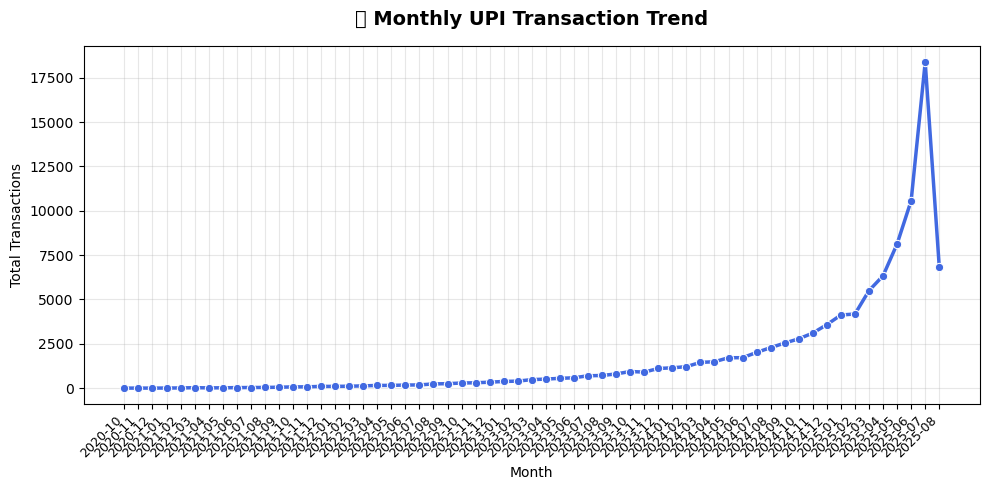

In [24]:
query = """
SELECT DATE_FORMAT(timestamp, '%%Y-%%m') AS month, COUNT(transaction_id) AS total_txn
FROM upi_transaction_history
GROUP BY month
ORDER BY month;
"""
trend_df = pd.read_sql(query, engine)

plt.figure(figsize=(10,5))
sns.lineplot(data=trend_df, x='month', y='total_txn', marker='o', color='royalblue', linewidth=2.5)
plt.title('📈 Monthly UPI Transaction Trend', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month'); plt.ylabel('Total Transactions')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\921438362.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_df, x='status', y='total_amount', palette='coolwarm')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\921438362.py:12: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.grid(axis='y', alpha=0.3); plt.tight_layout(); plt.show()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


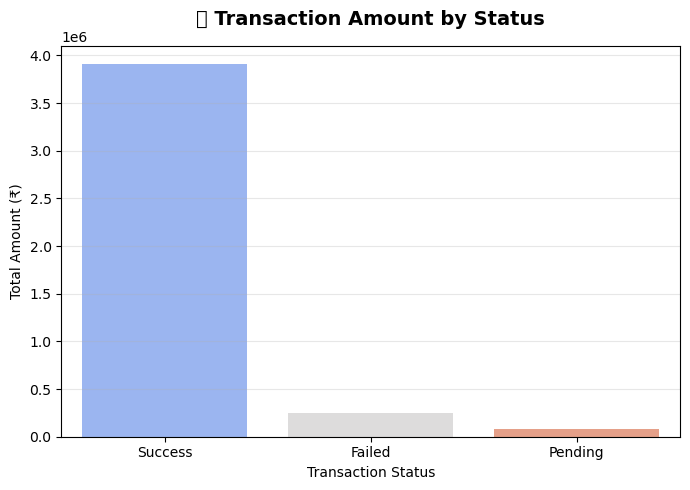

In [25]:
query = """
SELECT status, SUM(amount) AS total_amount
FROM upi_transaction_history
GROUP BY status;
"""
status_df = pd.read_sql(query, engine)

plt.figure(figsize=(7,5))
sns.barplot(data=status_df, x='status', y='total_amount', palette='coolwarm')
plt.title('💰 Transaction Amount by Status', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Transaction Status'); plt.ylabel('Total Amount (₹)')
plt.grid(axis='y', alpha=0.3); plt.tight_layout(); plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\914724224.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_device_df, x='device_type', y='total_frauds', palette='Blues_d')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\914724224.py:14: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.grid(axis='y', alpha=0.3); plt.tight_layout(); plt.show()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


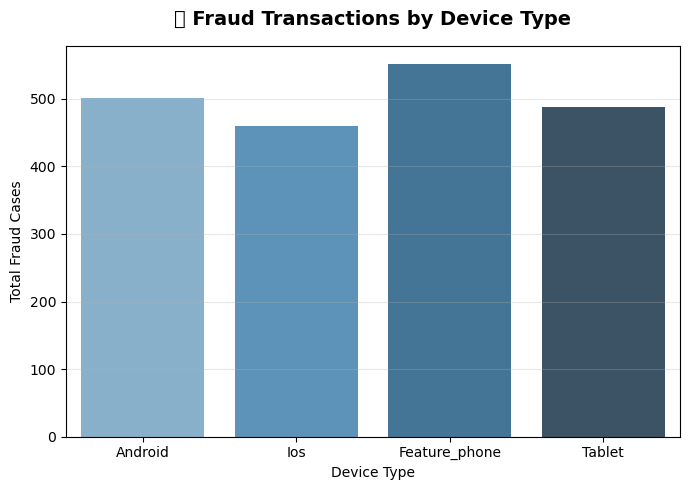

In [26]:
query = """
SELECT d.device_type, COUNT(f.alert_id) AS total_frauds
FROM fraud_alert_history f
JOIN upi_transaction_history t ON f.transaction_id = t.transaction_id
JOIN device_info d ON t.device_id = d.device_id
GROUP BY d.device_type;
"""
fraud_device_df = pd.read_sql(query, engine)

plt.figure(figsize=(7,5))
sns.barplot(data=fraud_device_df, x='device_type', y='total_frauds', palette='Blues_d')
plt.title('📱 Fraud Transactions by Device Type', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Device Type'); plt.ylabel('Total Fraud Cases')
plt.grid(axis='y', alpha=0.3); plt.tight_layout(); plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\544517852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_df, x='region', y='total_txn', palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\544517852.py:13: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.grid(axis='y', alpha=0.3); plt.tight_layout(); plt.show()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


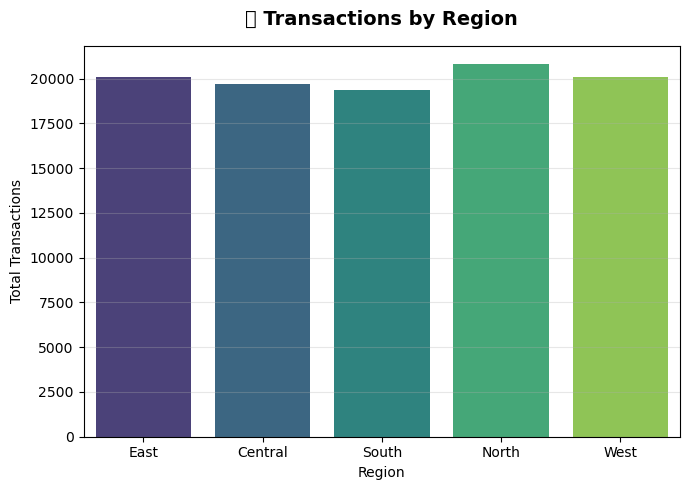

In [27]:
query = """
SELECT c.region, COUNT(t.transaction_id) AS total_txn
FROM upi_transaction_history t
JOIN customer_master c ON t.customer_id = c.customer_id
GROUP BY c.region;
"""
region_df = pd.read_sql(query, engine)

plt.figure(figsize=(7,5))
sns.barplot(data=region_df, x='region', y='total_txn', palette='viridis')
plt.title('🌍 Transactions by Region', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Region'); plt.ylabel('Total Transactions')
plt.grid(axis='y', alpha=0.3); plt.tight_layout(); plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\4054806958.py:12: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


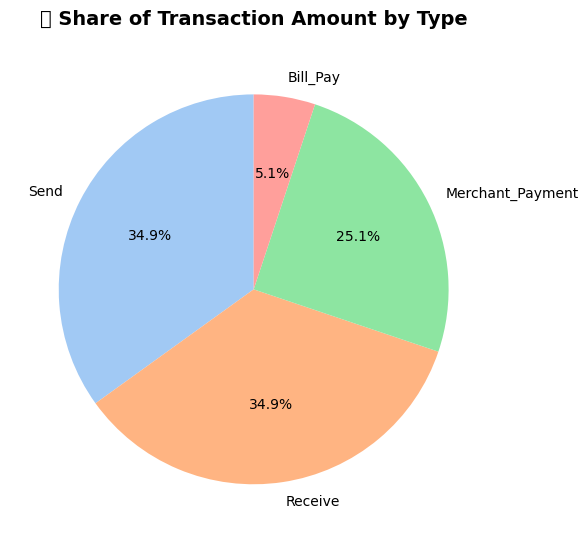

In [28]:
query = """
SELECT transaction_type, SUM(amount) AS total_amount
FROM upi_transaction_history
GROUP BY transaction_type;
"""
txn_type_df = pd.read_sql(query, engine)

plt.figure(figsize=(6,6))
plt.pie(txn_type_df['total_amount'], labels=txn_type_df['transaction_type'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('💳 Share of Transaction Amount by Type', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout(); plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\1505869718.py:15: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.grid(alpha=0.3); plt.tight_layout(); plt.show()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


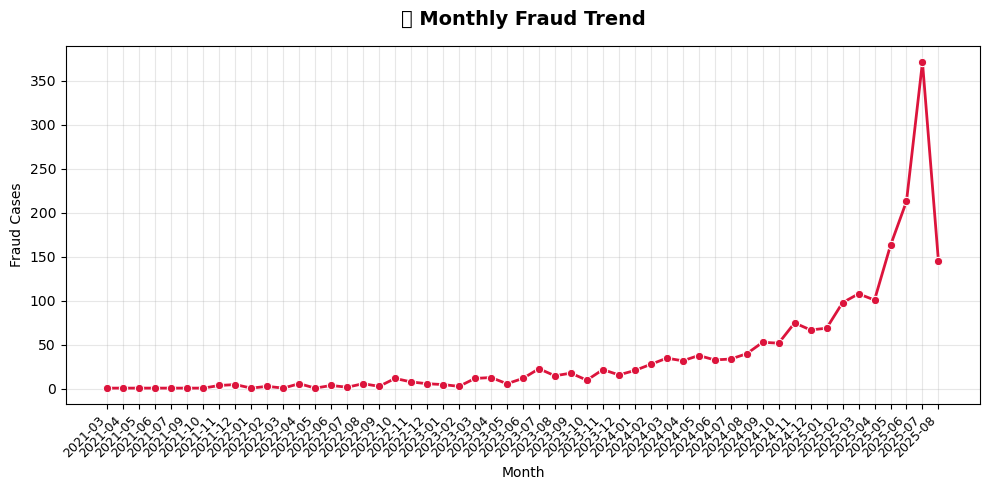

In [29]:
query = """
SELECT DATE_FORMAT(t.timestamp, '%%Y-%%m') AS month, COUNT(f.alert_id) AS total_frauds
FROM fraud_alert_history f
JOIN upi_transaction_history t ON f.transaction_id = t.transaction_id
GROUP BY month
ORDER BY month;
"""
fraud_trend_df = pd.read_sql(query, engine)

plt.figure(figsize=(10,5))
sns.lineplot(data=fraud_trend_df, x='month', y='total_frauds', marker='o', color='crimson', linewidth=2)
plt.title('🚨 Monthly Fraud Trend', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month'); plt.ylabel('Fraud Cases')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8112\1959649847.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()


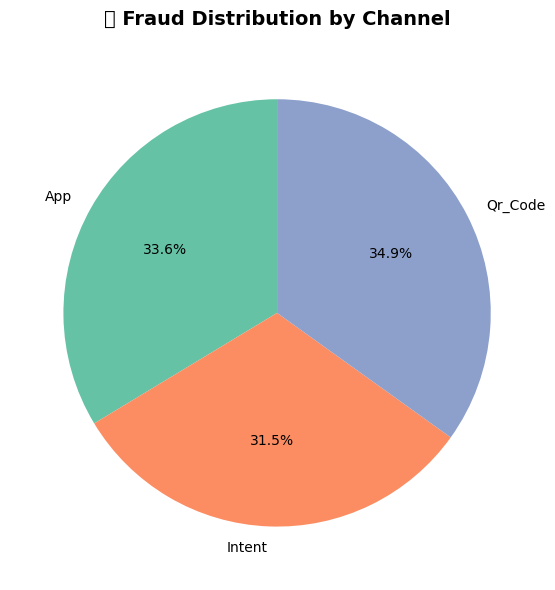

In [31]:
query = """
SELECT t.channel, COUNT(f.alert_id) AS fraud_cases
FROM fraud_alert_history f
JOIN upi_transaction_history t ON f.transaction_id = t.transaction_id
GROUP BY t.channel;
"""
channel_df = pd.read_sql(query, engine)

plt.figure(figsize=(6,6))
plt.pie(channel_df['fraud_cases'], labels=channel_df['channel'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('🔍 Fraud Distribution by Channel', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout(); plt.show()

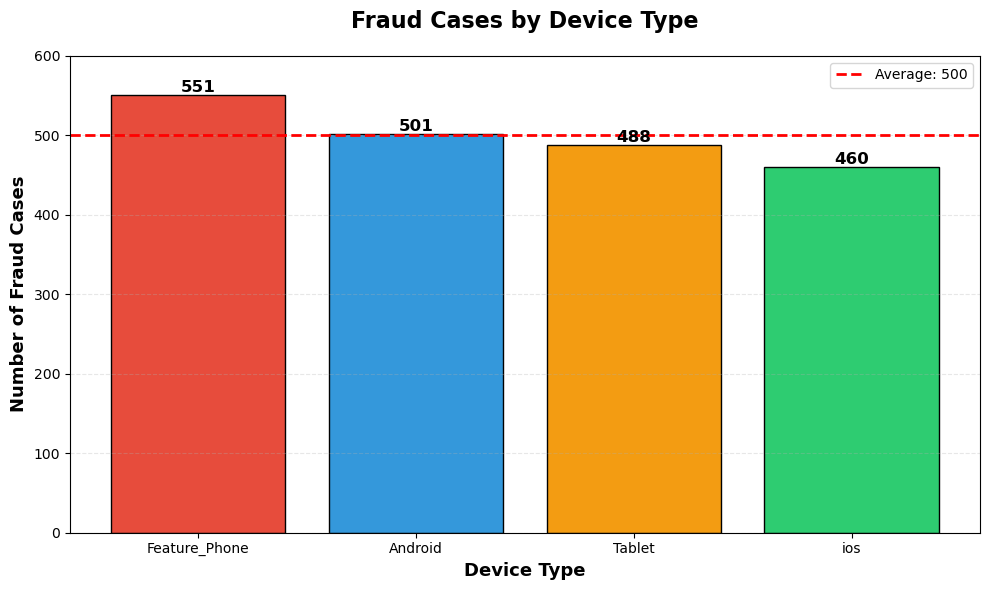

Chart 1 saved as 'fraud_by_device.png'


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from your analysis
devices = ['Feature_Phone', 'Android', 'Tablet', 'ios']
fraud_counts = [551, 501, 488, 460]

# Create figure
plt.figure(figsize=(10, 6))
bars = plt.bar(devices, fraud_counts, color=['#e74c3c', '#3498db', '#f39c12', '#2ecc71'], edgecolor='black')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Formatting
plt.title('Fraud Cases by Device Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Device Type', fontsize=13, fontweight='bold')
plt.ylabel('Number of Fraud Cases', fontsize=13, fontweight='bold')
plt.ylim(0, 600)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add horizontal line for average
avg_fraud = sum(fraud_counts) / len(fraud_counts)
plt.axhline(y=avg_fraud, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_fraud:.0f}')
plt.legend()

plt.tight_layout()
plt.savefig('fraud_by_device.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 1 saved as 'fraud_by_device.png'")

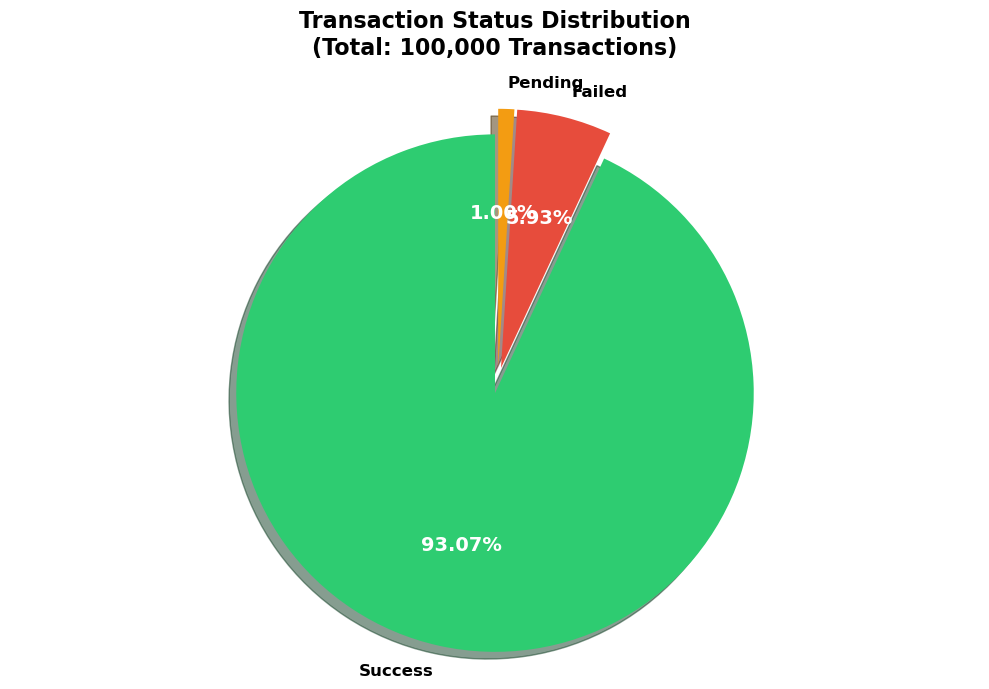

Chart 2 saved as 'transaction_status.png'


In [2]:
import matplotlib.pyplot as plt

# Data
statuses = ['Success', 'Failed', 'Pending']
counts = [92140, 5870, 990]  # Approximate (total = 100000)
colors = ['#2ecc71', '#e74c3c', '#f39c12']
explode = (0.05, 0.05, 0.05)  # Slightly separate all slices

# Create pie chart
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(counts, 
                                     labels=statuses, 
                                     autopct='%1.2f%%',
                                     colors=colors,
                                     explode=explode,
                                     shadow=True,
                                     startangle=90,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

# Make percentage text larger and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

# Title
plt.title('Transaction Status Distribution\n(Total: 100,000 Transactions)', 
          fontsize=16, fontweight='bold', pad=20)

# Equal aspect ratio for circular pie
plt.axis('equal')

plt.tight_layout()
plt.savefig('transaction_status.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 2 saved as 'transaction_status.png'")

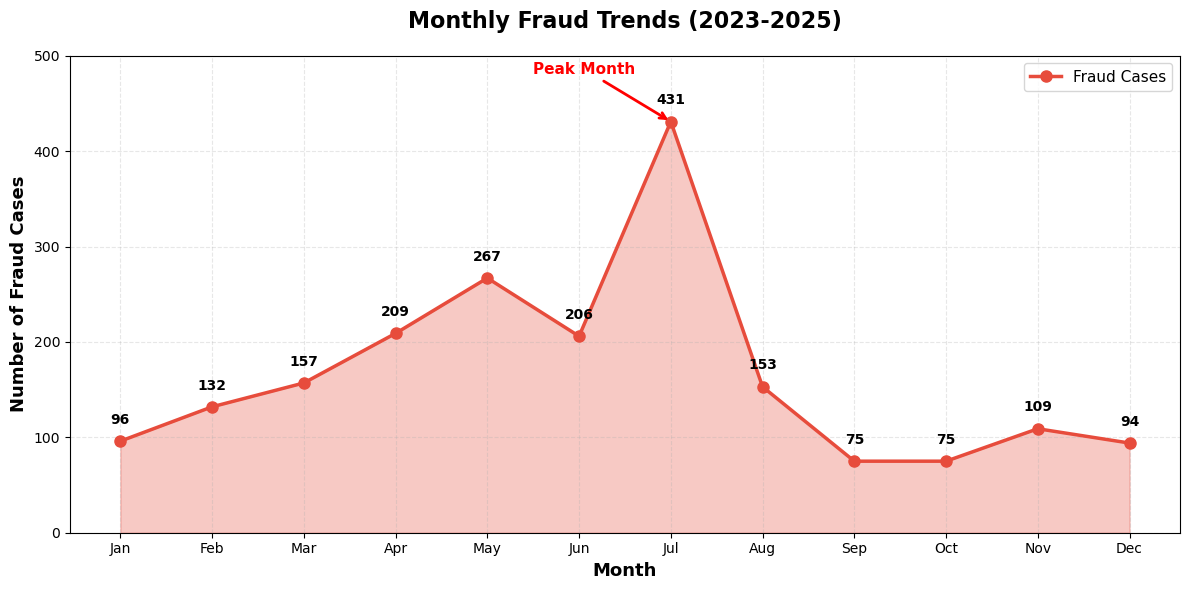

Chart 3 saved as 'monthly_fraud_trends.png'


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample monthly data (adjust based on your actual data)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fraud_cases = [96, 132, 157, 209, 267, 206, 431, 153, 75, 75, 109, 94]

# Create line chart
plt.figure(figsize=(12, 6))
plt.plot(months, fraud_cases, marker='o', linewidth=2.5, 
         markersize=8, color='#e74c3c', label='Fraud Cases')

# Fill area under curve
plt.fill_between(months, fraud_cases, alpha=0.3, color='#e74c3c')

# Add value labels on points
for i, value in enumerate(fraud_cases):
    plt.text(i, value + 15, str(value), ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

# Formatting
plt.title('Monthly Fraud Trends (2023-2025)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=13, fontweight='bold')
plt.ylabel('Number of Fraud Cases', fontsize=13, fontweight='bold')
plt.ylim(0, 500)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right')

# Highlight peak
max_idx = fraud_cases.index(max(fraud_cases))
plt.annotate('Peak Month', 
             xy=(max_idx, fraud_cases[max_idx]), 
             xytext=(max_idx-1.5, fraud_cases[max_idx]+50),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, fontweight='bold', color='red')

plt.tight_layout()
plt.savefig('monthly_fraud_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 3 saved as 'monthly_fraud_trends.png'")

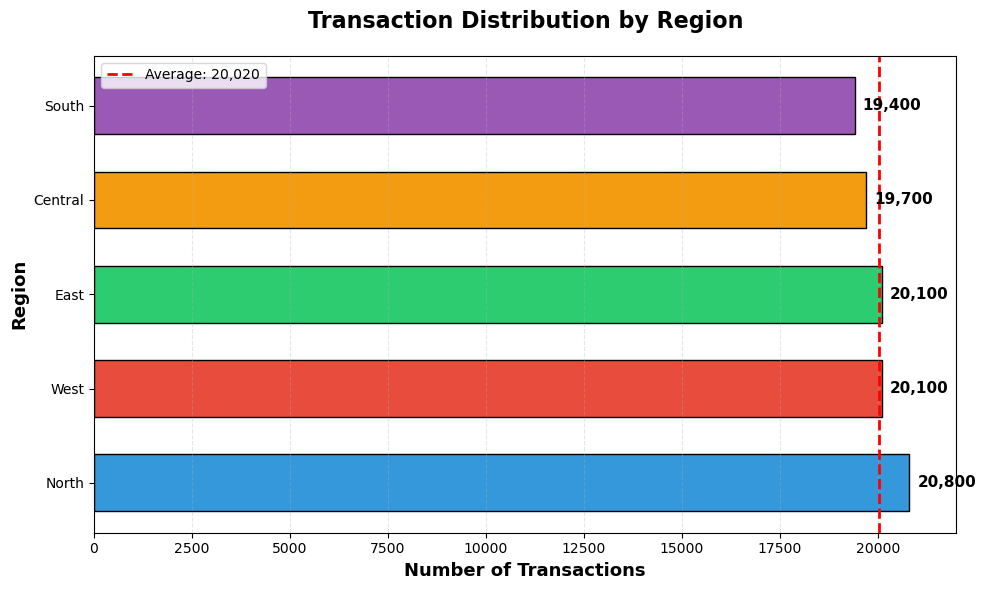

Chart 4 saved as 'regional_distribution.png'


In [4]:
import matplotlib.pyplot as plt

# Data
regions = ['North', 'West', 'East', 'Central', 'South']
transactions = [20800, 20100, 20100, 19700, 19400]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(regions, transactions, color=colors, edgecolor='black', height=0.6)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 200, bar.get_y() + bar.get_height()/2.,
             f'{int(width):,}',
             ha='left', va='center', fontsize=11, fontweight='bold')

# Formatting
plt.title('Transaction Distribution by Region', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Transactions', fontsize=13, fontweight='bold')
plt.ylabel('Region', fontsize=13, fontweight='bold')
plt.xlim(0, 22000)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add average line
avg_txn = sum(transactions) / len(transactions)
plt.axvline(x=avg_txn, color='red', linestyle='--', linewidth=2, 
            label=f'Average: {avg_txn:,.0f}')
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig('regional_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 4 saved as 'regional_distribution.png'")

C:\Users\DELL\AppData\Local\Temp\ipykernel_3096\454062056.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([normal_amounts, fraud_amounts],


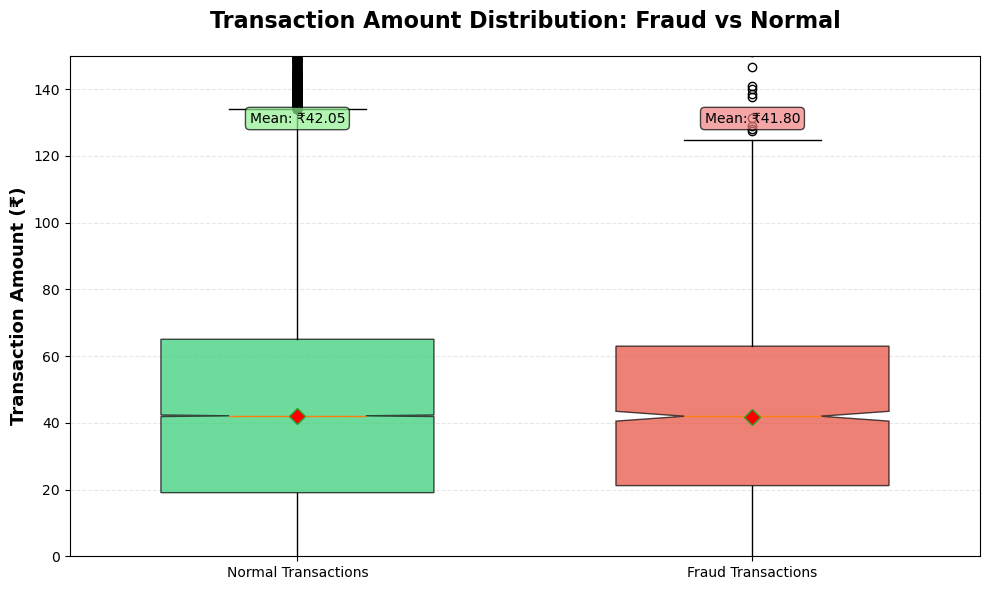

Chart 5 saved as 'fraud_vs_normal_amounts.png'


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (you can replace with actual data)
np.random.seed(42)
normal_amounts = np.random.normal(42, 34, 98000)  # 98K normal transactions
fraud_amounts = np.random.normal(42.36, 32, 2000)  # 2K fraud transactions

# Create box plot
fig, ax = plt.subplots(figsize=(10, 6))
bp = ax.boxplot([normal_amounts, fraud_amounts], 
                 labels=['Normal Transactions', 'Fraud Transactions'],
                 widths=0.6,
                 patch_artist=True,
                 notch=True,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
colors = ['#2ecc71', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Formatting
plt.title('Transaction Amount Distribution: Fraud vs Normal', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Transaction Amount (₹)', fontsize=13, fontweight='bold')
plt.ylim(0, 150)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add statistics text
normal_mean = np.mean(normal_amounts)
fraud_mean = np.mean(fraud_amounts)
plt.text(1, 130, f'Mean: ₹{normal_mean:.2f}', ha='center', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
plt.text(2, 130, f'Mean: ₹{fraud_mean:.2f}', ha='center', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.savefig('fraud_vs_normal_amounts.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 5 saved as 'fraud_vs_normal_amounts.png'")

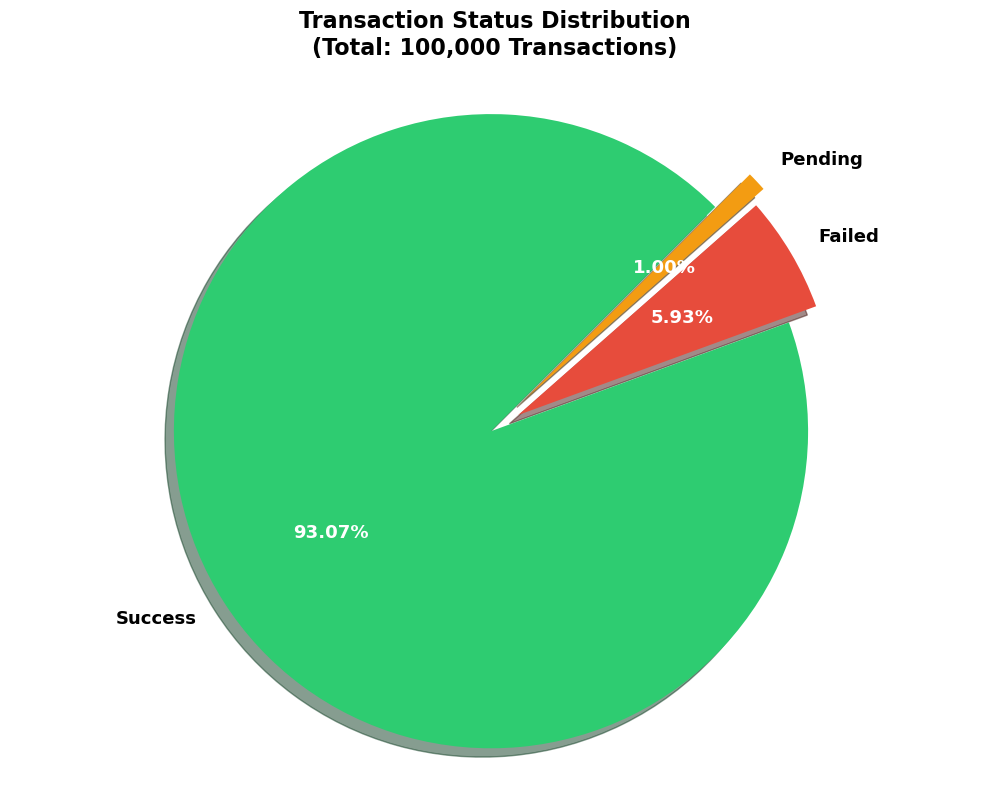

Improved chart saved!


In [6]:
import matplotlib.pyplot as plt

# Data
statuses = ['Success', 'Failed', 'Pending']
counts = [93070, 5930, 1000]  # Total = 100000
colors = ['#2ecc71', '#e74c3c', '#f39c12']
explode = (0, 0.1, 0.15)  # Explode Failed and Pending more

# Create pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(counts, 
                                     labels=statuses, 
                                     autopct='%1.2f%%',
                                     colors=colors,
                                     explode=explode,
                                     shadow=True,
                                     startangle=45,  # Changed angle
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

# Make percentage text white and bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')

# Make labels larger
for text in texts:
    text.set_fontsize(13)
    text.set_fontweight('bold')

# Title
plt.title('Transaction Status Distribution\n(Total: 100,000 Transactions)', 
          fontsize=16, fontweight='bold', pad=20)

# Equal aspect ratio
plt.axis('equal')

plt.tight_layout()
plt.savefig('transaction_status_v2.png', dpi=300, bbox_inches='tight')
plt.show()

print("Improved chart saved!")

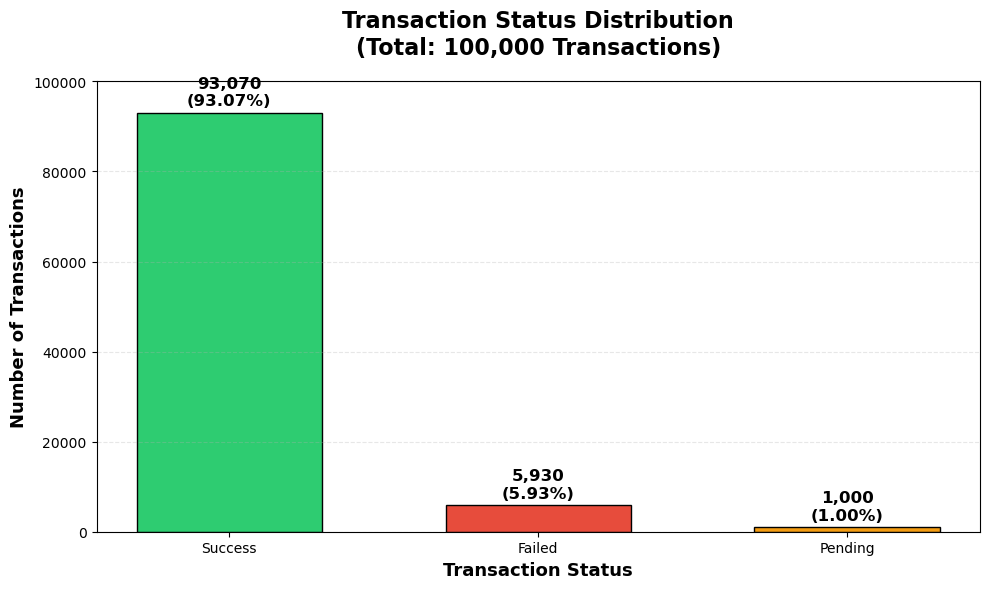

Bar chart saved!


In [7]:
import matplotlib.pyplot as plt

# Data
statuses = ['Success', 'Failed', 'Pending']
counts = [93070, 5930, 1000]
percentages = [93.07, 5.93, 1.00]
colors = ['#2ecc71', '#e74c3c', '#f39c12']

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(statuses, counts, color=colors, edgecolor='black', width=0.6)

# Add value labels
for i, (bar, pct) in enumerate(zip(bars, percentages)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'{int(height):,}\n({pct:.2f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Formatting
plt.title('Transaction Status Distribution\n(Total: 100,000 Transactions)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Transaction Status', fontsize=13, fontweight='bold')
plt.ylabel('Number of Transactions', fontsize=13, fontweight='bold')
plt.ylim(0, 100000)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('transaction_status_bar.png', dpi=300, bbox_inches='tight')
plt.show()

print("Bar chart saved!")